In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

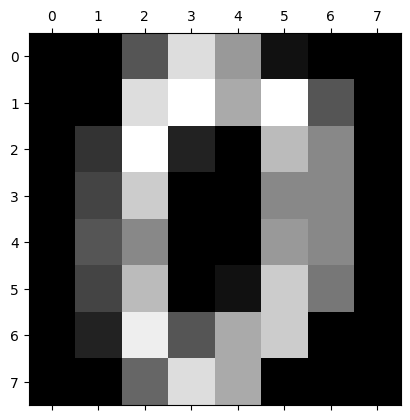

In [7]:
plt.gray()
plt.matshow(digits.images[0])

In [9]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [10]:
digits.target_names[0:5]

array([0, 1, 2, 3, 4])

In [11]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [15]:
len(x_train)

1437

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [18]:
model.fit(x_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
model.score(x_test, y_test)

0.9694444444444444

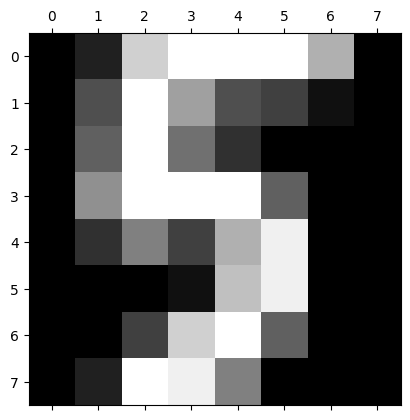

In [20]:
plt.matshow(digits.images[32])

In [22]:
digits.target[32]

5

In [24]:
model.predict([digits.data[32]])

array([5])

In [28]:
# in which cases it fails

#confusion matrix

y_predicted = model.predict(x_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  1, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 30,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 33,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 38,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 47,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 32,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  1, 37,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  3, 34]])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 2.9 MB/s eta 0:00:0000:0100:01


Text(95.72222222222221, 0.5, 'Truth')

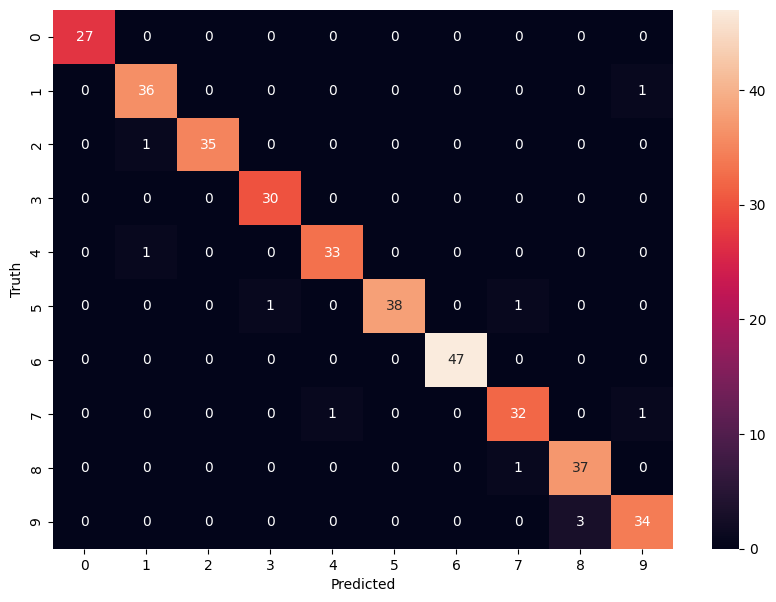

In [31]:
# for visualisation of what the f**k is happening

!pip install seaborn
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')